# [CDAF] Atividade 1

## Nome e matrícula
Nome: Luís Felipe Ramos Ferreira
Matrícula: 2019022553

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre aleatoriedade e previsão, trabalhando em cima do dataset do Soccer Prediction Challenge, disponível no Moodle.

## Questão 1
- Carregue o dataset 'TrainingSet_2023_02_08'
- Crie um histograma para a quantidade de gols marcados por jogo do time da casa, do time fora, de gols totais e da diferença de gols por partida.
- Caso hajam instâncias com valores nitidamente errados, destaque-os e remova-os antes de gerar os histogramas.
- Calcule o mínimo, o máximo e a média de cada um dos 4 histogramas solicitados acima.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df: pd.DataFrame = pd.read_excel("data/TrainingSet_2023_02_08.xlsx")
df

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L
...,...,...,...,...,...,...,...,...,...
299209,22-23,ZAF1,18/02/2023,Kaizer Chiefs,Golden Arrows,-1,-1,0,D
299210,22-23,ZAF1,18/02/2023,Sekhukhune United,Richards Bay FC,-1,-1,0,D
299211,22-23,ZAF1,18/02/2023,AmaZulu,Tim Sukazi Galaxy,-1,-1,0,D
299212,22-23,ZAF1,19/02/2023,Bloemfontein Celtic,SuperSport United,-1,-1,0,D


In [4]:
# Cleaning up data (a few matches had negative HS and AS)
df = df[(df["HS"] >= 0) & (df["AS"] >= 0)]

# The NG column represents the Number of Goals of the match
df["NG"] = df["HS"] + df["AS"]
df

/tmp/ipykernel_17290/3653738078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NG"] = df["HS"] + df["AS"]


,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,NG
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W,1
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W,5
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W,4
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D,4
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L,1
...,...,...,...,...,...,...,...,...,...,...
299203,22-23,ZAF1,04/02/2023,Golden Arrows,Bloemfontein Celtic,1,2,-1,L,3
299204,22-23,ZAF1,04/02/2023,Orlando Pirates,Mamelodi Sundowns,0,1,-1,L,1
299205,22-23,ZAF1,04/02/2023,SuperSport United,Cape Town City FC,2,0,2,W,2
299206,22-23,ZAF1,04/02/2023,Tshakhuma Tsha Madzivhandila,Sekhukhune United,2,0,2,W,2


In [5]:
def plot_hist(values: pd.Series, title: str, xlabel: str, ylabel: str, xticks: int = 10) -> None:
    f, ax = plt.subplots()
    plt.title(title)
    plt.xticks(np.arange(xticks), labels=np.arange(xticks))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.hist(values, bins=np.arange(xticks), alpha=0.5, edgecolor="black", linewidth=1.2, align="left")
    plt.text(0.75, 0.75, f"min = {values.describe()['min']}",transform=ax.transAxes, bbox=dict(facecolor="green", alpha=0.5))
    plt.text(0.75, 0.65, f"max = {values.describe()['max']}",transform=ax.transAxes, bbox=dict(facecolor="green", alpha=0.5))
    plt.text(0.75, 0.55, f"mean = {round(values.describe()['mean'], 3)}",transform=ax.transAxes, bbox=dict(facecolor="green", alpha=0.5))

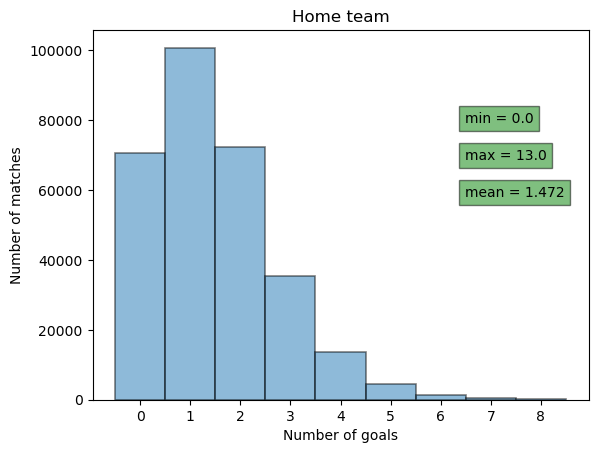

In [6]:
# Home team 
plot_hist(values=df["HS"], title="Home team", xlabel="Number of goals", ylabel="Number of matches")

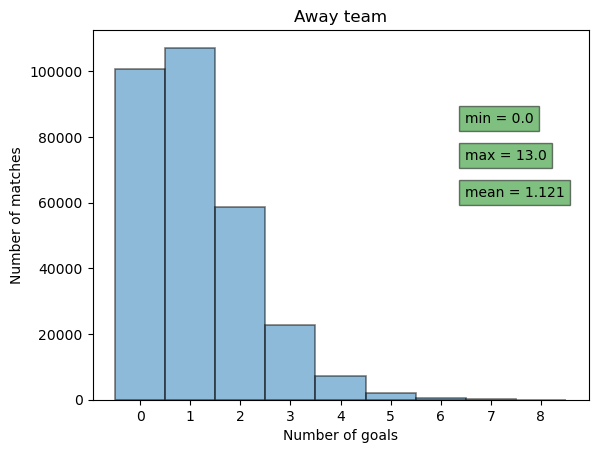

In [7]:
# Away team
plot_hist(values=df["AS"], title="Away team", xlabel="Number of goals", ylabel="Number of matches")

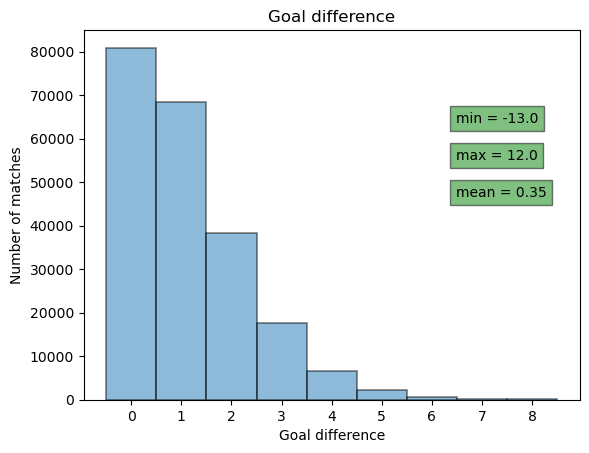

In [8]:
# Goal difference
plot_hist(values=df["GD"], title="Goal difference", xlabel="Goal difference", ylabel="Number of matches")

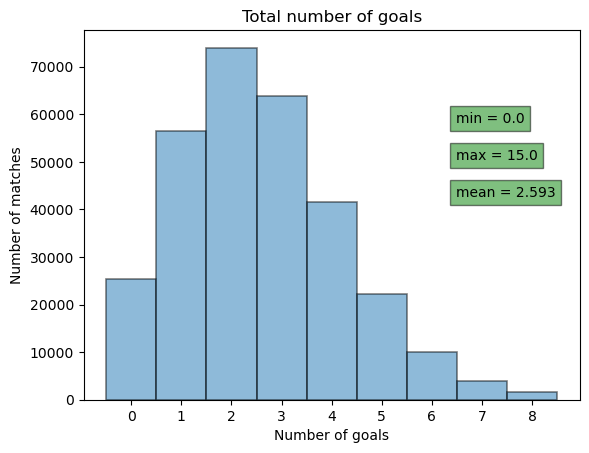

In [9]:
# Number of goals
plot_hist(values=df["NG"], title="Total number of goals", xlabel="Number of goals", ylabel="Number of matches")

## Questão 2
- Escolha uma temporada que já terminou, de alguma das ligas presentes no dataset.
- Realize os mesmos histogramas da questão 1, mas agora para a temporada escolhida.
- Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre a qualidade ofensiva da liga escolhida vs. o todo?

In [10]:
# Choosen league: Bra1 , Season 22-23
bra1_df: pd.DataFrame = df[(df["Lge"] == "BRA1") & (df["Sea"] == "22-23")]
bra1_df

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,NG
242680,22-23,BRA1,09/04/2022,Fluminense Rio de Janeiro,Santos FC,0,0,0,D,0
242681,22-23,BRA1,09/04/2022,Atletico Clube Goianiense,Flamengo Rio de Janeiro,1,1,0,D,2
242682,22-23,BRA1,10/04/2022,Sociedade Esportiva Palmeiras,Ceara SC,2,3,-1,L,5
242683,22-23,BRA1,10/04/2022,Coritiba FC,Goias Esporte Clube,3,0,3,W,3
242684,22-23,BRA1,10/04/2022,Atletico Mineiro,Internacional,2,0,2,W,2
...,...,...,...,...,...,...,...,...,...,...
243055,22-23,BRA1,13/11/2022,Corinthians Paulista,Atletico Mineiro,0,1,-1,L,1
243056,22-23,BRA1,13/11/2022,Cuiaba Esporte Clube,Coritiba FC,2,1,1,W,3
243057,22-23,BRA1,13/11/2022,Goias Esporte Clube,Sao Paulo FC,0,4,-4,L,4
243058,22-23,BRA1,13/11/2022,Internacional,Sociedade Esportiva Palmeiras,3,0,3,W,3


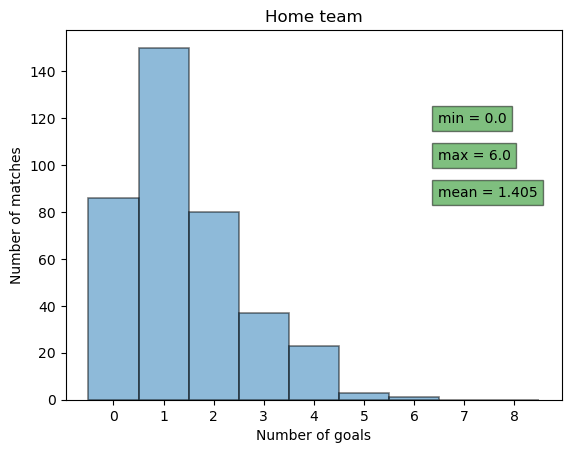

In [11]:
# Home team 
plot_hist(values=bra1_df["HS"], title="Home team", xlabel="Number of goals", ylabel="Number of matches")

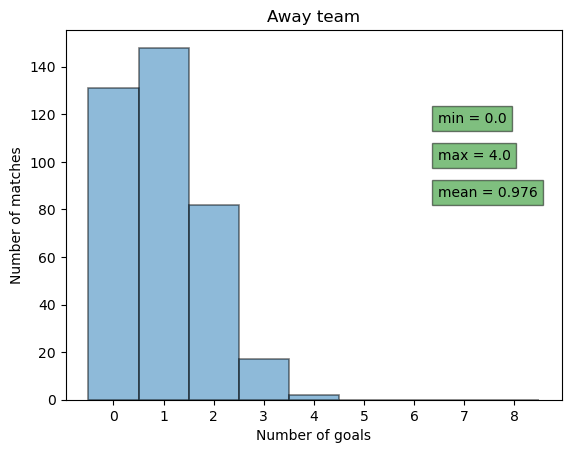

In [12]:
# Away team 
plot_hist(values=bra1_df["AS"], title="Away team", xlabel="Number of goals", ylabel="Number of matches")

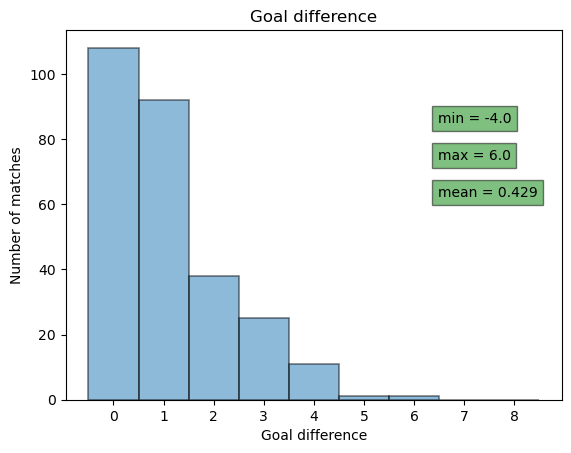

In [13]:
# Goal difference
plot_hist(values=bra1_df["GD"], title="Goal difference", xlabel="Goal difference", ylabel="Number of matches")

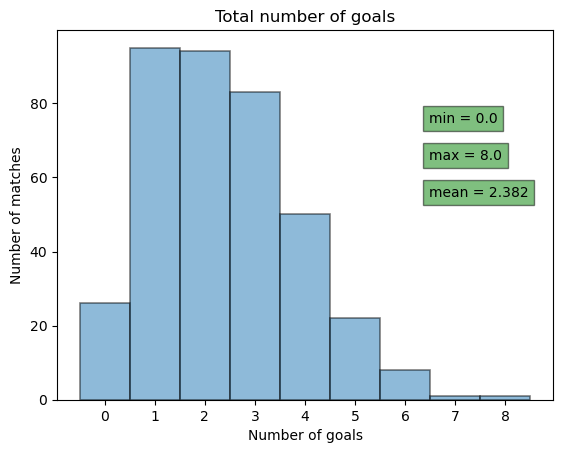

In [14]:
# Number of goals 
plot_hist(values=bra1_df["NG"], title="Total number of goals", xlabel="Number of goals", ylabel="Number of matches")

Comparando ambos os DataFrames (Brasileirão 22-23 e Geral), podemos notar que os histogramas gerados todos seguem distribuições extremanete similares para cada caso. Particularmente, podemos ver que:
    - Em média, os times da casa fazem aproximadamente 1.4 gols por partida, em ambas ocasiões. No caso do conjunto geral. podemos notar que o maior número de gols feito por um time jogando em casa foi de 13 gols, enquanto no Brasileirão o maior número de gols feito foi 6. Por outro lado, em ambos os casos o menor número de gols feito pelo time da casa foi 0, o que é esperado, já que não marcar gols jogando em casa é um evento comum. Em relação ao número de gols médio, podemos inferir que a qualidade ofensiva do time jogando em casa não se alterou para o caso específico do Brasileirão 22-23. Ou seja, ela seguiu um padrão esperado visto nas outras ligas.
    - Em relação aos gols feitos pelo time visitante, a média para o caso geral é aproximadamente 1.12 gols por jogo, enquanto para o Brasileirão 22-23 a média foi de aproximadamente 0.98. Diversos fatores podem explicar esse dado, mas uma análise exploratória mais detalhada é necessária para ter certeza das afirmações. No entanto, pode-se inferir que no Brasil alguns elementos do jogo fora de casa interferem mais na qualidade ofensiva dos times. Deve ser levado em consideração: pressão de torcida, qualidade dos gramados, condições de jogo, etc. Dessa maneira, notamos então que na temporada 22-23 do Brasileirão os times tiveram um desempenho abaixo do caso geral quando jogando fora de casa.
    - Sobre as diferenças de gols, notamos que a média para o Brasileirão 22-23 (aproximadamente 0.43) é superior à média para o caso geral (aproximadamente 0.35). Isso indica que, no Brasileirão, as equipes 

    TODO: pegar valor absoluto d diferença de gols?


In [15]:
bra1_df


,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,NG
242680,22-23,BRA1,09/04/2022,Fluminense Rio de Janeiro,Santos FC,0,0,0,D,0
242681,22-23,BRA1,09/04/2022,Atletico Clube Goianiense,Flamengo Rio de Janeiro,1,1,0,D,2
242682,22-23,BRA1,10/04/2022,Sociedade Esportiva Palmeiras,Ceara SC,2,3,-1,L,5
242683,22-23,BRA1,10/04/2022,Coritiba FC,Goias Esporte Clube,3,0,3,W,3
242684,22-23,BRA1,10/04/2022,Atletico Mineiro,Internacional,2,0,2,W,2
...,...,...,...,...,...,...,...,...,...,...
243055,22-23,BRA1,13/11/2022,Corinthians Paulista,Atletico Mineiro,0,1,-1,L,1
243056,22-23,BRA1,13/11/2022,Cuiaba Esporte Clube,Coritiba FC,2,1,1,W,3
243057,22-23,BRA1,13/11/2022,Goias Esporte Clube,Sao Paulo FC,0,4,-4,L,4
243058,22-23,BRA1,13/11/2022,Internacional,Sociedade Esportiva Palmeiras,3,0,3,W,3


## Questão 3
- À partir dos dados do campeonato em selecionado, crie um dataframe que corresponda à tabela de classificação ao fim da temporada contendo o nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols. Ordena a classificação por pontos, vitórias, saldo de gols e gols pró.
- Faça o mesmo para apenas para a primeira metade de jogos.

In [32]:
# Function to calculate table for any League in any season
def calc_table(matches_df: pd.DataFrame, lge: str, sea: str) -> pd.DataFrame:
    df: pd.DataFrame = matches_df[(matches_df["Lge"] == lge) & (matches_df["Sea"] == sea)]
    table_df: pd.DataFrame = pd.DataFrame(columns=["Club", "Played", "Won", "Drawn", "Lost", "GF", "GA", "GD", "Points"])
    for team in df["HT"].unique():
        aux_df: pd.DataFrame = df[(df["HT"] == team) | (df["AT"] == team)]
        won: int = len(aux_df[((aux_df["GD"] > 0) & (aux_df["HT"] == team)) | ((aux_df["GD"] < 0) & (aux_df["AT"] == team))])
        drawn: int = len(aux_df[aux_df["GD"] == 0])
        lost: int = 38 - won - drawn
        gf: int = aux_df[aux_df["HT"] == team]["HS"].sum() + aux_df[aux_df["AT"] == team]["AS"].sum()
        ga: int = aux_df[aux_df["HT"] == team]["AS"].sum() + aux_df[aux_df["AT"] == team]["HS"].sum()
        gd: int = gf - ga
        points: int = won * 3 + drawn * 1
        table_df = pd.concat([table_df, pd.DataFrame(data=[{"Club": team, "Played": 38, "Won": won, "Drawn": drawn, "Lost": lost, "GF": gf, "GA": ga, "GD": gd, "Points": points}])])
    table_df = table_df.sort_values(by=["Points", "Won", "GD", "GF"], ascending=False)
    table_df.reset_index(drop=True, inplace=True)
    return table_df

In [34]:
bra1_table_df: pd.DataFrame = calc_table(matches_df=df, lge="BRA1", sea="22-23")
bra1_table_df

,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,Sociedade Esportiva Palmeiras,38,23,12,3,66,27,39,81
1,Internacional,38,20,13,5,58,31,27,73
2,Fluminense Rio de Janeiro,38,21,7,10,63,41,22,70
3,Corinthians Paulista,38,18,11,9,44,36,8,65
4,Flamengo Rio de Janeiro,38,18,8,12,60,39,21,62
5,Atletico Paranaense,38,16,10,12,48,48,0,58
6,Atletico Mineiro,38,15,13,10,45,37,8,58
7,Fortaleza,38,15,10,13,46,39,7,55
8,Sao Paulo FC,38,13,15,10,55,42,13,54
9,America MG,38,15,8,15,40,40,0,53


## Questão 4
- Utilizando os jogos da liga escolhida, use regressão de Poisson para criar um modelo de previsão de resultados, como visto nos slides em sala e no Soccermatics.
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
- Dê print no sumário do ajuste
- Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa. Primeiro, apresente a quantidade esperada de gols de cada time. Em seguida, apresente um histograma com a probabilidade de diferentes placares entre os times.

## Questão 5
- Utilize o modelo treinado para simular os placares esperados de todos os jogos da temporada.
- Construa uma tabela de classificação em cima dos resultados esperados. Considere que jogos com uma diferença esperada de gols < 0.5 é um empate.
- Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? O que isso pode indicar em termos de o que modelo subestima e superestima sobre a qualidade dos times?